In [493]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [494]:
data = {"Length": [1, 1.3, 0.9, 1.7, 1.8, 1.2, 1.3, 1, 0.95],
    "Width": [0.2, 0.6, 0.7, 0.5, 0.9, 1.3, 1.2, 0.5, 0.6],
    "Label": [0, 0, 0, 1, 1, 1, 1, 0, 0]}
df = pd.DataFrame(data)
df

,Length,Width,Label
0,1.00,0.2,0
1,1.30,0.6,0
2,0.90,0.7,0
3,1.70,0.5,1
4,1.80,0.9,1
5,1.20,1.3,1
6,1.30,1.2,1
7,1.00,0.5,0
8,0.95,0.6,0


### Week Learner 1

In [495]:
len_shape = df.shape[0]

# initiate weights
df['Weight'] = 1/len_shape
df

,Length,Width,Label,Weight
0,1.00,0.2,0,0.111111
1,1.30,0.6,0,0.111111
2,0.90,0.7,0,0.111111
3,1.70,0.5,1,0.111111
4,1.80,0.9,1,0.111111
5,1.20,1.3,1,0.111111
6,1.30,1.2,1,0.111111
7,1.00,0.5,0,0.111111
8,0.95,0.6,0,0.111111


In [496]:
tree1 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42)
tree1.fit(df[['Length', 'Width']], df['Label'])

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

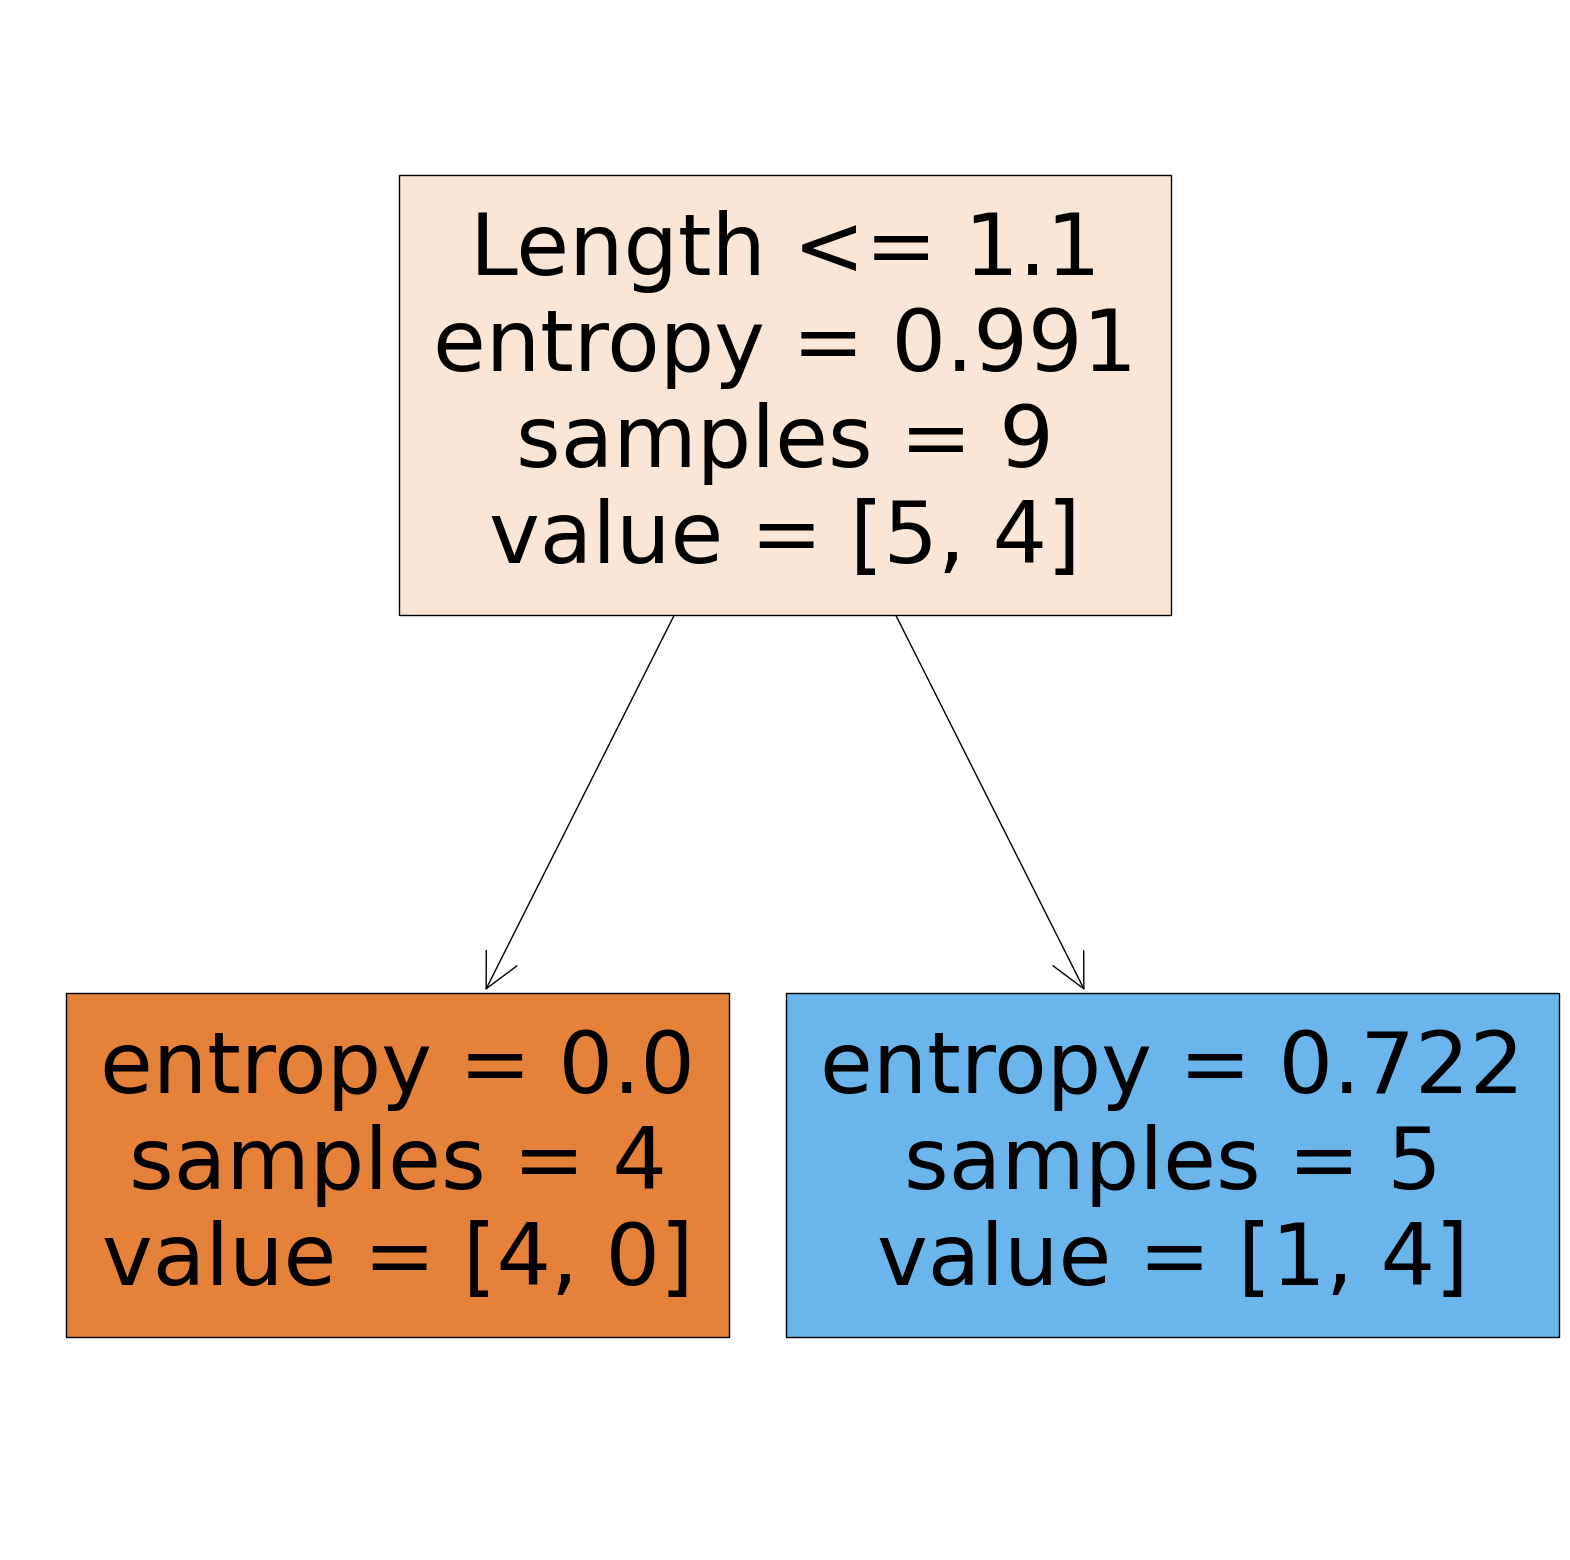

In [497]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(tree1, ax=ax, feature_names=['Length', 'Width'], filled=True)

plt.show()

In [498]:
prediction1 = tree1.predict(df[['Length', 'Width']])

In [499]:
prediction1

array([0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [500]:
import math

total_error = 0
for idx, value in enumerate(prediction1):
    if df.loc[idx, 'Label'] != value:
        total_error += df.loc[idx, 'Weight']

epsilon = 0.1
alpha1 = 0.5 * math.log((1-total_error+epsilon)/(total_error+epsilon))
print(alpha1)

0.7720986952828497


### Week Learner 2

In [501]:
for idx, value in enumerate(prediction1):
    if df.loc[idx, 'Label'] != value:
        df.loc[idx, 'Weight'] *= np.exp(alpha1)
    else:
        df.loc[idx, 'Weight'] *= np.exp(-alpha1)
df

,Length,Width,Label,Weight
0,1.00,0.2,0,0.051338
1,1.30,0.6,0,0.240478
2,0.90,0.7,0,0.051338
3,1.70,0.5,1,0.051338
4,1.80,0.9,1,0.051338
5,1.20,1.3,1,0.051338
6,1.30,1.2,1,0.051338
7,1.00,0.5,0,0.051338
8,0.95,0.6,0,0.051338


In [502]:
# normalization
df['Weight'] = [weight/df['Weight'].sum() for weight in df['Weight']]
df

,Length,Width,Label,Weight
0,1.00,0.2,0,0.078838
1,1.30,0.6,0,0.369295
2,0.90,0.7,0,0.078838
3,1.70,0.5,1,0.078838
4,1.80,0.9,1,0.078838
5,1.20,1.3,1,0.078838
6,1.30,1.2,1,0.078838
7,1.00,0.5,0,0.078838
8,0.95,0.6,0,0.078838


In [503]:
df['Random'] = 0.
for idx, value in enumerate(df['Weight']):
    if idx == 0:
        df.loc[idx, 'Random'] = df.loc[idx, 'Weight']
    else:
        df.loc[idx, 'Random'] = df.loc[idx, 'Weight'] + df.loc[idx-1, 'Random']
df

,Length,Width,Label,Weight,Random
0,1.00,0.2,0,0.078838,0.078838
1,1.30,0.6,0,0.369295,0.448133
2,0.90,0.7,0,0.078838,0.526971
3,1.70,0.5,1,0.078838,0.605809
4,1.80,0.9,1,0.078838,0.684647
5,1.20,1.3,1,0.078838,0.763485
6,1.30,1.2,1,0.078838,0.842324
7,1.00,0.5,0,0.078838,0.921162
8,0.95,0.6,0,0.078838,1.000000


In [504]:
random.uniform(0, 1)

0.006498759678061017

In [505]:
idx_values = []
random_prob = [0.1, 0.7, 0.2, 0.7, 0.2, 0.8, 0.1, 0.4, 0.7]
for i in range(len(random_prob)):
    prob = random_prob[i]
    best_idx = 0
    for idx, prob_random in enumerate(df['Random']):
        if prob <= prob_random:
            idx_values.append(idx)
            break

new_df = pd.DataFrame()
df2 = df.iloc[idx_values]
df2

,Length,Width,Label,Weight,Random
1,1.3,0.6,0,0.369295,0.448133
5,1.2,1.3,1,0.078838,0.763485
1,1.3,0.6,0,0.369295,0.448133
5,1.2,1.3,1,0.078838,0.763485
1,1.3,0.6,0,0.369295,0.448133
6,1.3,1.2,1,0.078838,0.842324
1,1.3,0.6,0,0.369295,0.448133
1,1.3,0.6,0,0.369295,0.448133
5,1.2,1.3,1,0.078838,0.763485


In [506]:
df2.loc[:, 'Weight'] = 1/df2.shape[0]
df2.loc[:, 'Random'] = 0.
df2

,Length,Width,Label,Weight,Random
1,1.3,0.6,0,0.111111,0.0
5,1.2,1.3,1,0.111111,0.0
1,1.3,0.6,0,0.111111,0.0
5,1.2,1.3,1,0.111111,0.0
1,1.3,0.6,0,0.111111,0.0
6,1.3,1.2,1,0.111111,0.0
1,1.3,0.6,0,0.111111,0.0
1,1.3,0.6,0,0.111111,0.0
5,1.2,1.3,1,0.111111,0.0


In [507]:
df2 = df2.reset_index()
df2

,index,Length,Width,Label,Weight,Random
0,1,1.3,0.6,0,0.111111,0.0
1,5,1.2,1.3,1,0.111111,0.0
2,1,1.3,0.6,0,0.111111,0.0
3,5,1.2,1.3,1,0.111111,0.0
4,1,1.3,0.6,0,0.111111,0.0
5,6,1.3,1.2,1,0.111111,0.0
6,1,1.3,0.6,0,0.111111,0.0
7,1,1.3,0.6,0,0.111111,0.0
8,5,1.2,1.3,1,0.111111,0.0


In [508]:
tree2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42)
tree2.fit(df2[['Length', 'Width']], df2['Label'])

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

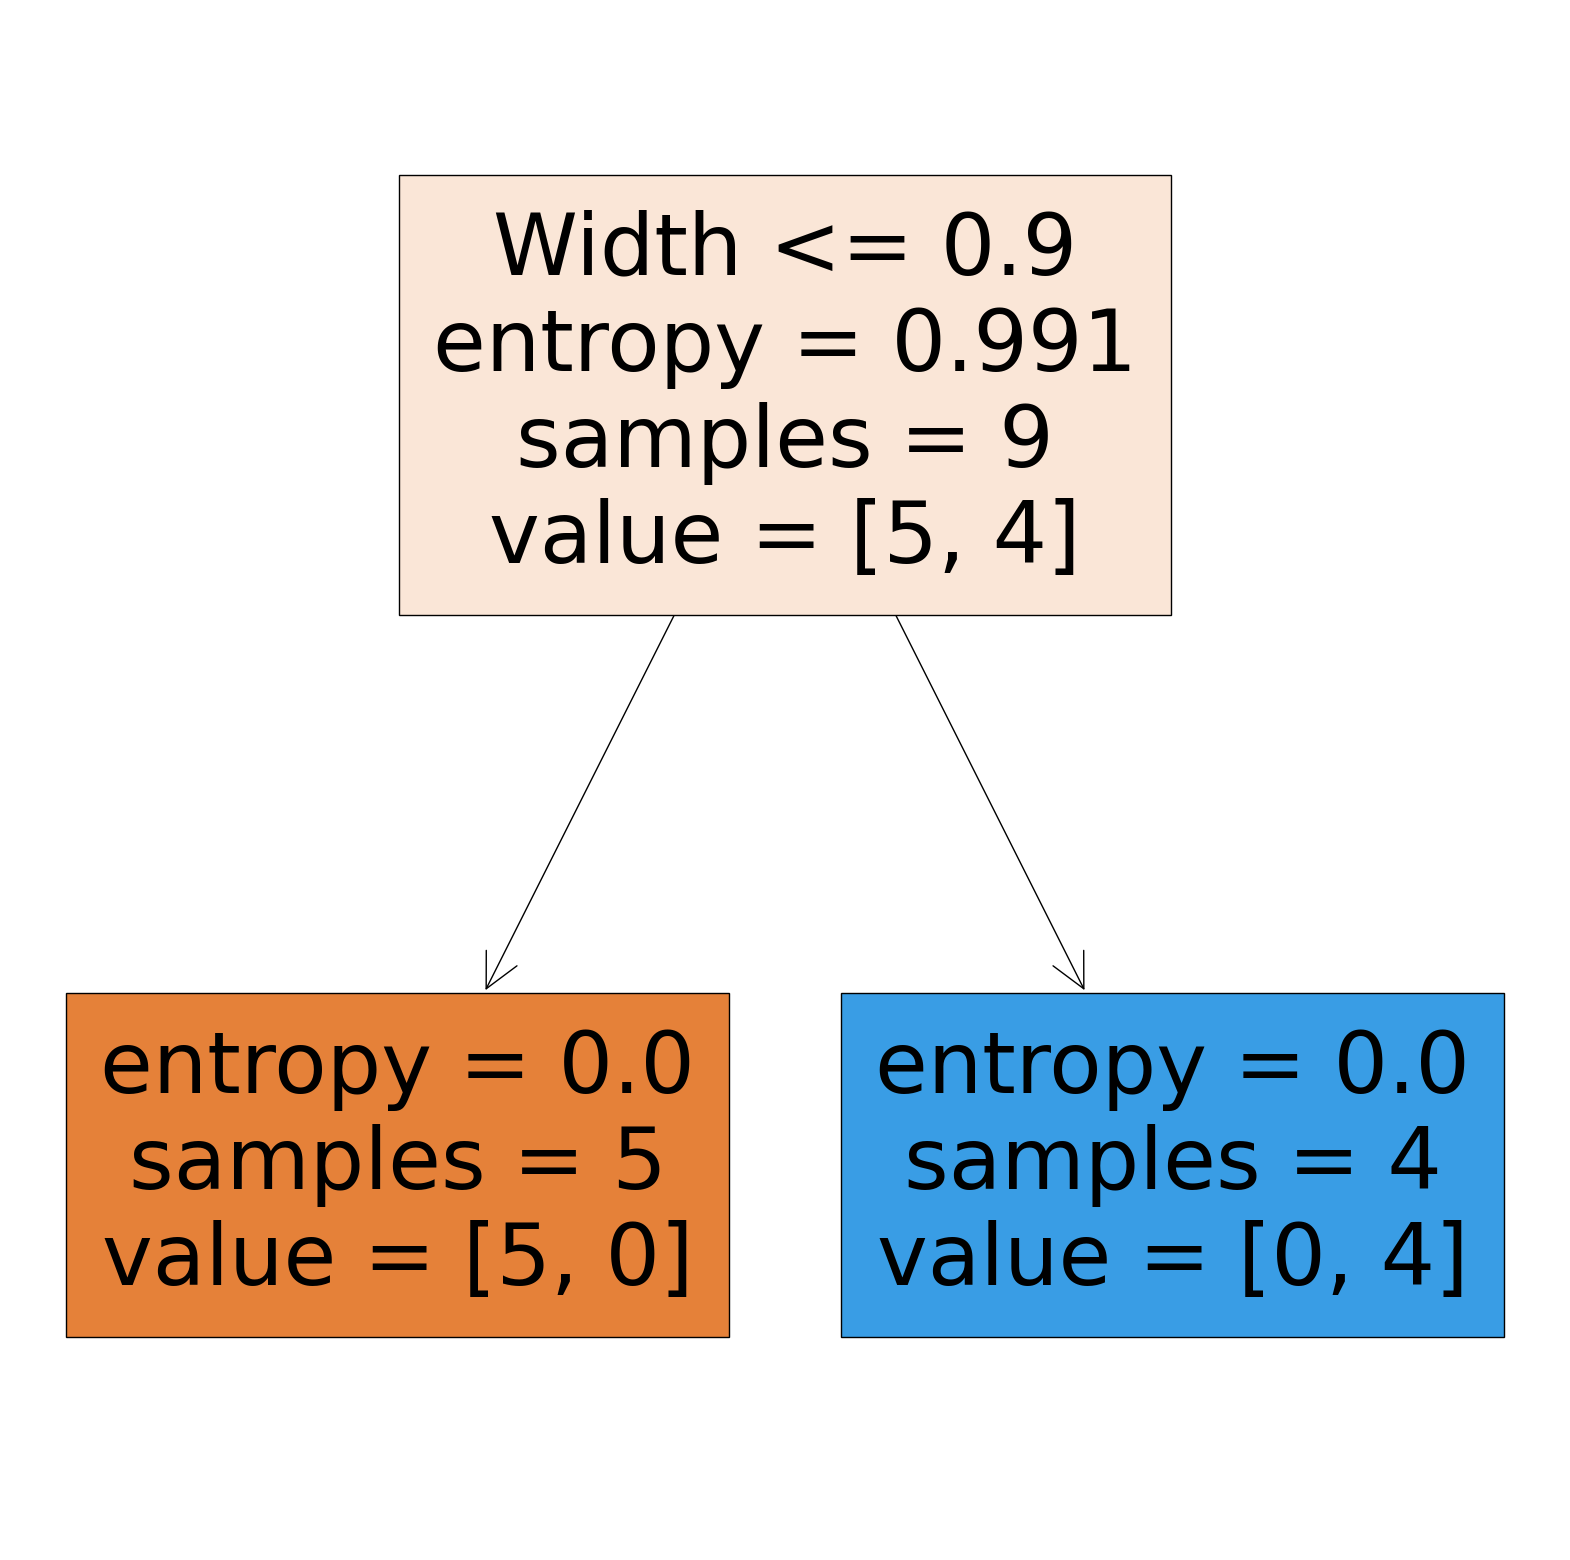

In [509]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(tree2, ax=ax, feature_names=['Length', 'Width'], filled=True)

plt.show()

In [510]:
prediction2 = tree2.predict(df2[['Length', 'Width']])
prediction2

array([0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [511]:
import math

total_error2 = 0
for idx, value in enumerate(prediction2):
    if df2.loc[idx, 'Label'] != value:
        total_error2 += df2.loc[idx, 'Weight']
epsilon=0.1
alpha2 = 0.5 * math.log((1-total_error2+epsilon)/(total_error2+epsilon))
print(alpha2)

1.1989476363991853


Notice: In my case, the total error is 0. This means that the model has perfectly classified all the training examples. When error_rate = 0, we have the 0.5*log(infinity) is infinity, indicate that the weak learner is given infinite importance. => Set a small threshold.
This couble be happen because of the choice of random sample


In [512]:
# classifier = tree1*alpha1 + tree2*alpha2

data_test = {"Length": [1.1, 1.2, 0.5, 0.9, 0.8],
    "Width": [0.8, 0.9, 0.5, 1, 1.2],
    "Label": [0, 1, 0, 1, 1]}
df_test = pd.DataFrame(data_test)


In [513]:
prediction1 = tree1.predict(df_test[['Length', 'Width']])
print("Tree1: ", accuracy_score(prediction1, df_test['Label']))
prediction2 = tree2.predict(df_test[['Length', 'Width']])
print("Tree2: ", accuracy_score(prediction2, df_test['Label']))

Tree1:  0.6
Tree2:  0.8


In [514]:
total_alpha = alpha1 + alpha2
alpha1 /= total_alpha
alpha2 /= total_alpha

In [515]:
ensemble_prediction = prediction1*alpha1 + prediction2*alpha2
print(ensemble_prediction)
for i in range(len(ensemble_prediction)):
    if ensemble_prediction[i] >= 0.5:
        ensemble_prediction[i] = 1
    else:
        ensemble_prediction[i] = 0
print(ensemble_prediction)
print("Adaboost: ", accuracy_score(ensemble_prediction, df_test["Label"]))

[0.         0.39172022 0.         0.60827978 0.60827978]
[0. 0. 0. 1. 1.]
Adaboost:  0.8


In [516]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [517]:

# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Helper functions
def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation


    Note that all arrays should be the same length
    '''

    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

def compute_alpha(error):
    '''
    Calculate the weight of a weak classifier m in the majority vote of the final classifier. This is called
    alpha in chapter 10.1 of The Elements of Statistical Learning. Arguments:
    error: error rate from weak classifier m
    '''
    espilon = 0.01
    return np.log((1 - error + espilon) / (error+espilon))

def update_weights_formular1(w_i, alpha, y, y_pred):
    result = w_i * np.exp(-alpha * y * y_pred)
    w_norm = result / np.sum(result)
    return w_norm


def update_weights_formular2(w_i, alpha, y, y_pred):
    result = w_i * np.exp(alpha * (
        np.not_equal(y, y_pred)).astype(int))
    w_norm = result / np.sum(result)
    return w_norm


# Define AdaBoost class
class AIVNAdaBoost:

    def __init__(self):
        # self.w_i = None
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables
        y: target variable
        M: number of boosting rounds. Default is 100
        '''

        # Clear before calling
        self.alphas = []
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):

            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # At m = 0, weights are all the same and equal to 1 / N
            else:
                 w_i = update_weights_formular2(w_i, alpha_m, y, y_pred)
                # w_i = update_weights_formular1(w_i, alpha_m, y, y_pred)
            # print(w_i)

            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = 1)     # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)

            self.G_M.append(G_m) # Save to list of weak classifiers

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)
            # print(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)
            # print(alpha_m)

        assert len(self.G_M) == len(self.alphas)


    def predict(self, X):
        '''
        Predict using fitted model. Arguments:
        X: independent variables
        '''

        # Initialise dataframe with weak predictions for each observation
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M))

        # Predict class label for each weak classifier, weighted by alpha_m
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            #weak_preds.iloc[:,m] = y_pred_m
            weak_preds[weak_preds.columns[m]] = y_pred_m

        # Estimate final predictions
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

    def error_rates(self, X, y):
        '''
        Get the error rates of each weak classifier. Arguments:
        X: independent variables
        y: target variables associated to X
        '''

        self.prediction_errors = [] # Clear before calling

        # Predict class label for each weak classifier
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X)
            error_m = compute_error(y = y, y_pred = y_pred_m, w_i = np.ones(len(y)))
            self.prediction_errors.append(error_m)

In [518]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  


In [519]:
#Prepare dataset
X, y = make_classification(n_samples= 1000, n_features = 20, random_state = 42)
y = y * 2 - 1       # Original AdaBoost uses {1, -1} as class labels

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [522]:
# Fit model
ab = AIVNAdaBoost()
ab.fit(X_train, y_train, M = 50)

# Predict on test set
y_pred = ab.predict(X_test)
print('The accuracy_score of the model is:', round(accuracy_score(y_test, y_pred), 4))

The accuracy_score of the model is: 0.87


In [523]:
from sklearn.ensemble import AdaBoostClassifier

ab_sk = AdaBoostClassifier(n_estimators = 50)
ab_sk.fit(X_train, y_train)
y_pred_sk = ab_sk.predict(X_test)
print('The accuracy_score of the model is:', round(accuracy_score(y_test, y_pred_sk), 4))

e:\Anaconda\envs\anhHop\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy_score of the model is: 0.87
